<a href="https://colab.research.google.com/github/junieberry/ML-PerfectGuide/blob/main/02_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
import sklearn

## 02 붓꽃 품종 예측하기

- 꽃잎 길이, 너비, 꽃받침 길이, 너비로 품종 예측
- 의사 결정 트리 사용

1. 데이터 세트 분리
2. 모델 학습
3. 예측 수행
4. 평가

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# 붓꽃 데이터 로드
iris = load_iris()

iris_data = iris.data
iris_label = iris.target
iris_feature = iris.feature_names

iris_df = pd.DataFrame(data = iris_data, columns=iris_feature)
iris_df['label'] = iris_label
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
## 학습용 데이터와 테스트용 데이터 분리

x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [ ]:
## 의사결정트리로 학습과 예측 수행

dt_clf = DecisionTreeClassifier(random_state = 11)
# 학습 수행
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
from sklearn.metrics import accuracy_score
# 테스트 데이터로 예측 수행
pred = dt_clf.predict(x_test)

# 정확도 측정
print(accuracy_score(y_test, pred))

0.9333333333333333


## 03 사이킷런의 기반 프레임워크 익히기

- `fit()` : 모델 학습
- `predict()` : 모델 예측

<br>

**Estimator (지도학습)**
- Classifier : 분류 알고리즘
- Regressor : 회귀 알고리즘

### 예제 데이터셋

- `data` : 피쳐 데이터 세트
- `target` : 분류 시 레이블 값, 회귀 시 숫자 결괏값
- `target_names` : 개별 레이블 이름
- `feature_names` : 피쳐 이름
- `DESCR` : 데이터 셋 및 피쳐 설명

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

print('key : ', iris.keys())
print('feature name : ', iris.feature_names)
print('target_names: ', iris.target_names)
print('target', iris.target)
print('data', iris.data)

## 04 Model Selection 모듈 소개

- train 데이터셋과 test 데이터셋 분리 혹은 교차 검증
- Estimator 하이퍼파라미터 튜닝

### 학습/테스트 데이터 분리

`train_test_split`

- `test_size` 
- `train_size`
- `shuffle`
- `random_state` 

1. 학습 피처 데이터셋
2. 테스트 피처 데이터셋
3. 학습 레이블 데이터셋
4. 테스트 레이블 데이터셋

### 교차검증

- train/test split은 과적합에 취약
- 데이터 편중을 막기 위해 별로의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 수행



#### K 폴드 교차 검증
- K개의 데이터 폴드 세트를 만들어 K번 반복

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

## KFol 객체와 폴드 세트별 정확도를 담을 리스트 객체
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터셋 크기: ',features.shape[0])

붓꽃 데이터셋 크기:  150


In [ ]:
n_iter = 0

#KFold의 split()하면 폴드별 train/test 인덱스 array로 반환
for train_index, test_index in kfold.split(features):
    # fold 별로 데이터셋 찢기
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1

    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]

    print('\n#{0} 교차 검증 정확도: {1}'.format(n_iter, accuracy))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)


print('\n\n 평균 검증 정확도: ',np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


 평균 검증 정확도:  0.9


#### Stratified K 폴드

불균형한 분포도를 가진 데이터 집합을 위한 K 폴드 방식
- 원본 데이터의 레이블 분포를 학습과 검증 데이터셋에 분배한다

In [ ]:
kfold = KFold(n_splits=3)
print('----------일반 K fold---------') 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

----------일반 K fold---------
## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

print('----------Straified K fold---------') 
skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

----------Straified K fold---------
## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


### cross_val_score()

1. 폴드 세트 설정
2. for 루프에서 학습 및 테스트 데이터 인덱스 추출
3. 학습과 예측 수행하고 결과 반환

- `estimator`
- `X` : 피쳐 데이터 세트
- `y` : 레이블 데이터 세트
- `scoring` : 예측 성능 평가 지표
- `cv` : 교차 검증 폴드

<br>

**`scoring`으로 지정된 성능 지표 측정값을 배열로 반환**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV

- 하이퍼파라미터의 집합을 만들고 이를 순차적으로 적용해서 최적화

- `estimator`
- `param_grid` : 파라미터명과 파라미터 값을 딕셔너리로!
- `scoring`
- `cv`
- `refit` : True면 최적의 하이퍼파라미터로 estimator을 재학습

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [ ]:
import pandas as pd
 
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# param_grid의 하이퍼 파라미터들을 학습, 평가
grid_dtree.fit(x_train, y_train)

# cv_result는 gridsearchcv의 결과 세트로, 딕셔너리 형태
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

# params : 하이퍼파라미터
# rank_test_score : score 순위
# mean_test_score : test score 평균

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
print('최적 파라미터:', grid_dtree.best_params_)
print('최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고 정확도: 0.9750


In [ ]:
## refit으로 학습된 estimator
estimator = grid_dtree.best_estimator_

pred = estimator.predict(x_test)
accuracy_score(y_test,pred)

0.9666666666666667

## 05 데이터 전처리

### 데이터 인코딩

1. 레이블 인코딩
    
    - `LabelEncoder.fit()`
    - `LabelEncoder.transform()`
    - `LabelEncoder.inverse_transform()`
    숫자의 크고 작음이 예측 성능에 영향을 미칠 수 있다!
2. 원-핫 인코딩

    - 고유 값에 해당하는 칼럼에만 1을 표시
    - `OneHotEncoder` 주의점
        - 모든 문자열 값이 숫자형 값이 되어야함
        - 입력 값으로 2차원 데이터가 필요

In [3]:
## 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장공', '전자레인지', '컴퓨터', '선풍기', '선풍기']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

print('인코딩 변환값 : ', labels)
print('인코딩 클래스 : ', encoder.classes_)
print('디코딩 원본값 : ', encoder.inverse_transform([4, 2, 0, 1, 1, 3]))

인코딩 변환값 :  [0 1 3 4 2 2]
인코딩 클래스 :  ['TV' '냉장공' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값 :  ['컴퓨터' '선풍기' 'TV' '냉장공' '냉장공' '전자레인지']


In [10]:
## 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장공', '전자레인지', '컴퓨터', '선풍기', '선풍기']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
## 2차원 데이터로 변현
labels = labels.reshape(-1, 1)

## 원핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원핫 인코딩 데이터 :\n' , oh_labels)
print('원핫 인코딩 차원 : ', oh_labels.toarray().shape)

원핫 인코딩 데이터 :
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 4)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
원핫 인코딩 차원 :  (6, 5)


In [11]:
## pandas 개꿀 api
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장공', '전자레인지', '컴퓨터', '선풍기', '선풍기']})
pd.get_dummies(df)

,item_TV,item_냉장공,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0
5,0,0,1,0,0


### 피쳐 스케일링과 정규화
피쳐 스케일링이란 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

1. 표준화

    데이터 피처를 평균이 0이고 분산이 1인 가우시안 정규 분포로 변환
    
2. 정규화

    서로 다른 피처의 크기를 통일하기 위해 크기를 변환
    개별 데이터의 크기를 모두 똑같은 단위로 변경 (모두 0-1)


---


1. `StandardScaler`

    - 가우시안 정규 분포

2. `MinMaxScaler`

    - 데이터를 0과 1사이의 값으로 반환


In [12]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [13]:
## Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df) ## ndarray

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- `fit()` : 데이터 변환을 위한 기준 정보 설정 적용
- `transform()` : 설정된 정보로 데이터 변환

이때 학습 데이터에서 `fit`하면 이와 같은 스케일링 정보를 테스트 데이터에도 적용해야함!

1. 가능하다면 전체 데이터의 스케일링 변환을 적용 후 학습과 테스트 데이터로 분리
2. 그렇지 않다면 학습 데이터로 fit된 scaling 객체를 통해 transform

## 06 사이킷런으로 수행하는 타이타닉 생존자 예측

### 데이터 전처리 및 탐색

In [16]:
## 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
## 학습 데이터 정보 확인
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [18]:
## 널 값 처리 (Age, cabin, Embarked)
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [19]:
## 데이터 분포 보기
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [27]:
## Cabin의 경우 N이 너무 많고 속성 값이 제대로 표시가 안됨
## 좀 중요해보이는 선실 등급(앞글자)만 따오자

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


- 여성, 아이들, 노인
- 부자, 유명인

In [28]:
## 성별에 따른 생존자 수
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

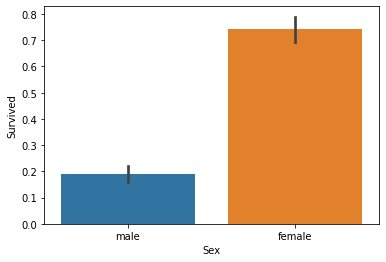

In [31]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

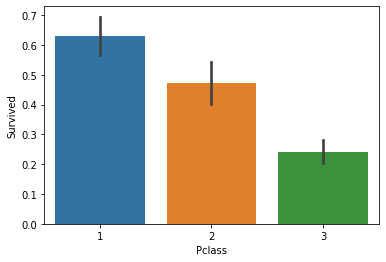

In [32]:
sns.barplot(x='Pclass', y = 'Survived', data=titanic_df)

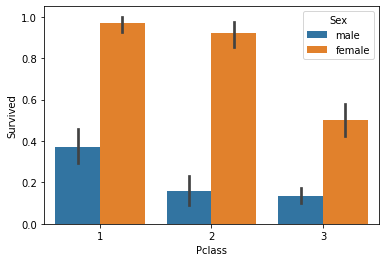

In [34]:
sns.barplot(x='Pclass', y = 'Survived', hue='Sex', data=titanic_df)

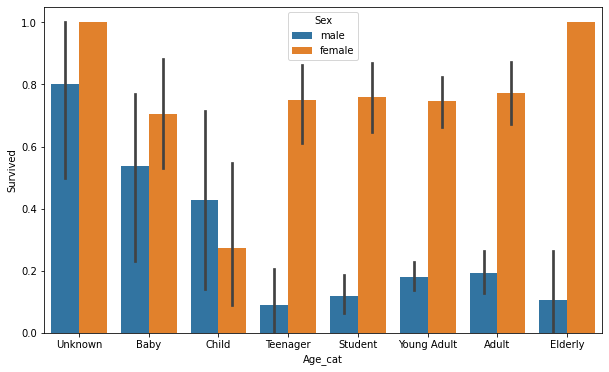

In [35]:
## 나이로 구분

def get_category(age):
    if age <=1: return 'Unknown'
    elif age <= 5: return 'Baby'
    elif age <= 12: return 'Child'
    elif age <= 18: return 'Teenager'
    elif age <= 25: return 'Student'
    elif age <= 35: return 'Young Adult'
    elif age <= 60: return 'Adult'
    else: return 'Elderly'

# 막대그래프 figure
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [36]:
## 문자열 카테고리 숫자로 변환

from sklearn import preprocessing

def encode_feature(data):
    features = ['Cabin', 'Sex', 'Embarked']
    for f in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[f])
        data[f] = le.transform(data[f])
    
    return data

titanic_df = encode_feature(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 데이터 전처리 (진짜)

In [39]:
# 널처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요 속성 제고
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# 데이터 전처리
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [40]:
titanic_df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df= titanic_df.drop('Survived',axis=1)

x_titanic_df = transform_features(x_titanic_df)

In [42]:
# train test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTree
dt_clf.fit(x_train , y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTree 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForest
rf_clf.fit(x_train , y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForest 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression
lr_clf.fit(x_train , y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTree 정확도: 0.7877
RandomForest 정확도:0.8547
LogisticRegression: 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [48]:
## KFold 교차검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    score = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, pred)
        score.append(accuracy)

        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
    
    #
    mean_score = np.mean(score)
    print("평균 정확도 {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 0.7823


In [50]:
## cross val score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [54]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(x_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
